<h1>Introdução</h1>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [48]:
path = 'data/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_4353266/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_4353266.csv'
df = pd.read_csv(path, skiprows=4, sep=',', decimal='.', encoding='latin1')

# Utilizar apenas os dados disponíveis (entre 1960 e 2019)
for i in range(1960, 1991):
    del df[str(i)]
df.drop(['2020', '2021', 'Unnamed: 66'], axis=1, inplace=True)

df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.953224,0.915661,0.916485,0.917093,0.936570,0.947393,...,1.021548,0.979352,0.992616,1.005027,1.016649,0.966589,0.948410,0.937926,0.917507,0.913618
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.167682,0.095958,0.084721,0.075546,0.068468,0.062588,...,0.243614,0.296506,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.530016,0.568305,0.523529,0.470888,0.501681,0.564390,...,0.472077,0.476789,0.480603,0.508099,0.515960,0.494065,0.499405,0.483140,0.486456,0.493923
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.544539,0.543557,0.708984,0.836804,0.912141,1.072168,...,0.976184,0.985522,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137


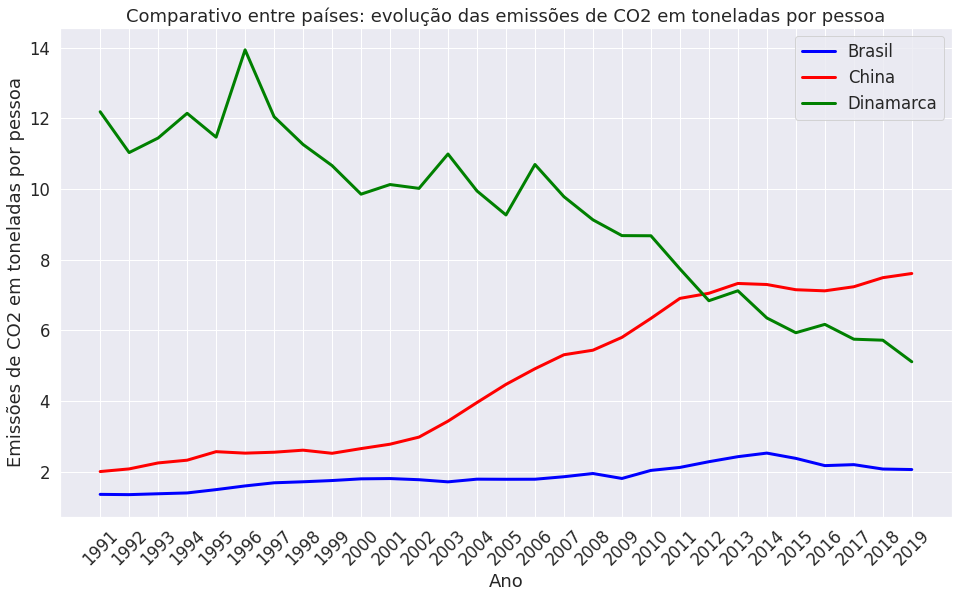

In [51]:
df_brasil = df[df['Country Name'] == 'Brazil']
df_china = df[df['Country Name'] == 'China']
df_dinamarca = df[df['Country Name'] == 'Denmark']

df_brasil = df_brasil.drop(['Country Code', 'Country Name', 'Indicator Name', 'Indicator Code'], axis=1)
df_china = df_china.drop(['Country Code', 'Country Name', 'Indicator Name', 'Indicator Code'], axis=1)
df_dinamarca = df_dinamarca.drop(['Country Code', 'Country Name', 'Indicator Name', 'Indicator Code'], axis=1)

df_brasil = df_brasil.transpose()
df_china = df_china.transpose()
df_dinamarca = df_dinamarca.transpose()

df_brasil.columns = ['Emissões de CO2 em toneladas por pessoa']
df_china.columns = ['Emissões de CO2 em toneladas por pessoa']
df_dinamarca.columns = ['Emissões de CO2 em toneladas por pessoa']

sns.set(rc={'figure.figsize':(16, 9)}, font_scale = 1.5, style='darkgrid')
sns.lineplot(data=df_brasil, linewidth=3, palette=['blue'], label='Brasil', legend=False)
sns.lineplot(data=df_china, linewidth=3, palette=['red'], label='China', legend=False)
sns.lineplot(data=df_dinamarca, linewidth=3, palette=['green'], label='Dinamarca', legend=False)
plt.title('Comparativo entre países: evolução das emissões de CO2 em toneladas por pessoa')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 em toneladas por pessoa')
plt.xticks(rotation=45)
plt.legend()
plt.show()


<h1>Gráficos Individuais</h1>
Para exemplificar a evolução individual e tais países, o grupo também elaborou gráficos lineares individuais. Com eles, é possível observar tendências de alta para Brasil e China, e de baixa para a Dinamarca.

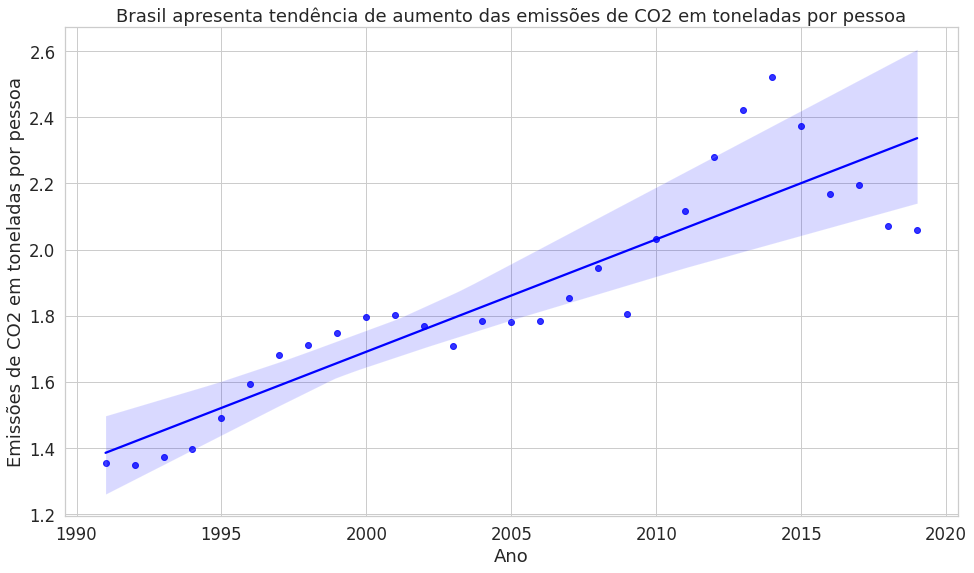

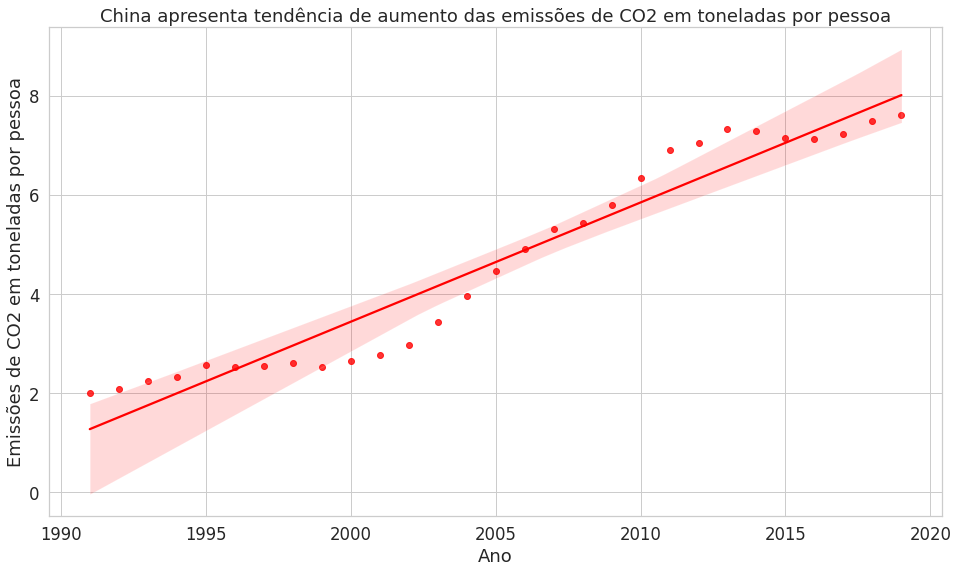

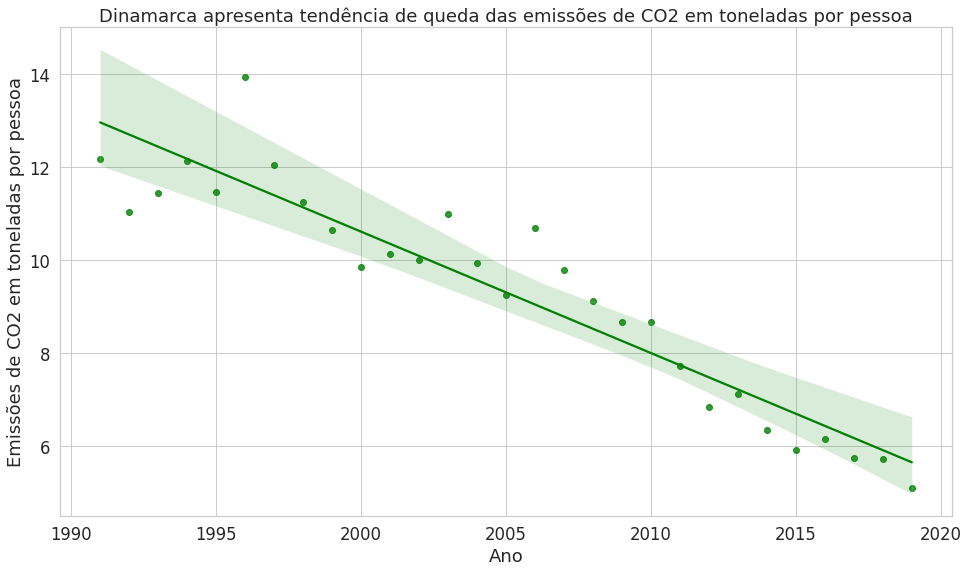

In [52]:
sns.set(rc={'figure.figsize':(16, 9)}, font_scale = 1.5, style='whitegrid')
sns.regplot(data=df_brasil.astype(float), x=df_brasil.index.astype(float), y='Emissões de CO2 em toneladas por pessoa', color='blue', ci=99.9)
plt.title('Brasil apresenta tendência de aumento das emissões de CO2 em toneladas por pessoa')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 em toneladas por pessoa')
plt.xticks(rotation=0)
plt.show()

sns.set(rc={'figure.figsize':(16, 9)}, font_scale = 1.5, style='whitegrid')
sns.regplot(data=df_china.astype(float), x=df_china.index.astype(float), y='Emissões de CO2 em toneladas por pessoa', color='red', ci=99.9)
plt.title('China apresenta tendência de aumento das emissões de CO2 em toneladas por pessoa')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 em toneladas por pessoa')
plt.xticks(rotation=0)
plt.show()

sns.set(rc={'figure.figsize':(16, 9)}, font_scale = 1.5, style='whitegrid')
sns.regplot(data=df_dinamarca.astype(float), x=df_dinamarca.index.astype(float), y='Emissões de CO2 em toneladas por pessoa', color='green', ci=99.9)
plt.title('Dinamarca apresenta tendência de queda das emissões de CO2 em toneladas por pessoa')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 em toneladas por pessoa')
plt.xticks(rotation=0)
plt.show()